<a href="https://colab.research.google.com/github/KomalPareva/Project/blob/main/servo_pred_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Servo Prediction using Linear Regression

#Get Understanding about Data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

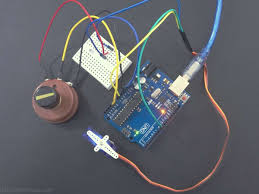

**What is Servo**: In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism, On displacement-controlled applications,it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect.The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any measureable variables. For example, an automotive power contrast a car's cruise uses closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 obervations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo sytem involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the transitional axes of a robot on the 9th floor of the AI lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:

1.Motor A,B,C,D,E
2.Screw A,B,C,D,E
3.Pgain 3,4,5,6
4.Vgain 1,2,3,4,5
5.Class 0.13 to 7.10

#Import Libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

#Import CSV as DataFrame

In [ ]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/Servo%20Mechanism.csv")

#Get First Five Rows of the DataFrame




In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


#Get Information of DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


#Get Column Names

In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

#Get Shape of DataFrame

In [ ]:
df.shape

(167, 5)

#Get Categories and Counts of Categorical Variables

In [ ]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [ ]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


#Get Encoding of Categorical Features

In [ ]:
df.replace({'Motor':{'A':1,'B':2,'C':3,'D':4,'E':5},
           'Screw':{'A':1,'B':2,'C':3,'D':4,'E':5}},inplace=True)

#Define y (dependent or target variable) and X (independent or features or attribute variable)

In [ ]:
y = df['Class']

In [ ]:
y.shape

(167,)

In [ ]:
 y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [ ]:
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

or use drop function to define X

In [ ]:
x = df.drop(['Class'],axis=1)

In [ ]:
x.shape


(167, 4)

In [ ]:
x

,Motor,Screw,Pgain,Vgain
0,5,5,5,4
1,2,4,6,5
2,4,4,4,3
3,2,1,3,2
4,4,2,6,5
...,...,...,...,...
162,2,3,3,2
163,2,5,3,1
164,3,4,4,3
165,1,2,3,2


#Get Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

#Get Model Train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

#Get Model Prediction

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred.shape

(51,)

In [ ]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

#Get Model Evalution

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

7.1905396772512375

In [ ]:
mean_squared_error(y_test,y_pred)

66.03589175595567

In [ ]:
r2_score(y_test,y_pred)

0.6807245170563925

#Get Visualization of Actual Vs Predicted Results

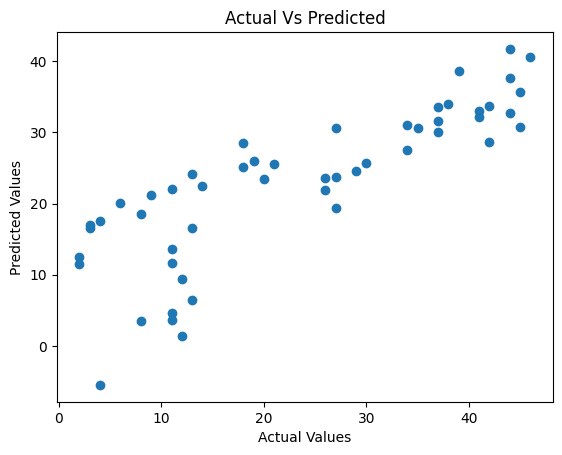

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel(f'Actual Values')
plt.ylabel(f'Predicted Values')
plt.title(f'Actual Vs Predicted')
plt.show()

#Get Future Predictions

**Lets select a random sample from existing dataset as new value**

Steps to follow
1. Extract a random row using sample function
2. Seperate X and y
3. Standardize X
4. Predict




In [ ]:
X_new = df.sample()

In [ ]:
X_new


,Motor,Screw,Pgain,Vgain,Class
140,5,5,4,2,11


In [ ]:
X_new.shape

NameError: name 'x_new' is not defined

In [ ]:
X_new = X_new.drop('Class',axis=1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain,Class
140,5,5,4,2,11


In [ ]:
X_new.shape

(1, 4)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([9.96783665])